# ЛАБОРАТОРНАЯ РАБОТА 5
## ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

### Задача 5.1.
Вычислить значение интеграла $\int\limits_1^3 {P_m(x)dx}$, где $P_m(x)= \displaystyle\sum_{i=0}^{m} C_ix^{i}$ , с помощью  квадратурных  формул  левых прямоугольников и по формуле индивидуального варианта с точностью  0.01. Вычислить интеграл по формуле Гаусса.

### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ

1. Вычислить  аналитически значение интеграла $I$.
2. Используя выражение для остаточного  члена интегрирования (см. ПРИЛОЖЕНИЕ 5.B), оценить шаг интегрирования  $h$ , при котором  величина погрешности  квадратурной формулы  будет меньше $\varepsilon$ . Вычислить число отрезков разбиения n.
3. Вычислить значение интеграла $I^h$ по составной квадратурной  формуле левых прямоугольников  с найденным шагом $h$ . Найти величину погрешности $R^h =  |{I-I^h}|$ .
4. Проделать те же действия (п. 2 - 3)  для вычисления интеграла $I$ по квадратурной формуле  из индивидуального варианта.
5. Основываясь на  заданной степени многочлена m, выбрать число узлов для квадратуры Гаусса, обеспечивающее вычисление интеграла без погрешности. Вычислить  интеграл $I^G$.
6. Результаты внести в таблицу 5.1

### По формуле левых прямоугольников:

I =  155.92000000000002 err =  1.7310597399955443e-12
h =  4.170141784820684e-05
n =  47960
Интеграл по ф-ле л. прямоугольников=  155.912578847678
Остаточный член ф-лы л. прямоугольников=  0.007421152322024227


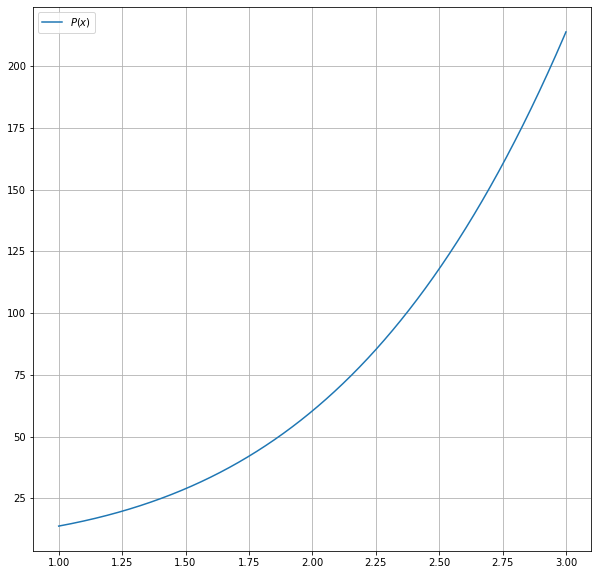

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 
#from scipy import quad 


C0 = 7.4
C1 = -2.3
C2 = 6.6
C3 = 0.3
C4 = 1.8
a=1
b=3
e=0.01

def P(x):
    return C0*x**0+C1*x**1+C2*x**2+C3*x**3+C4*x**4

def dP(x):
    return C1+C2*2*x+C3*3*x**2+C4*4*x**3


x_data=np.linspace(1, 3, 100000)
M1 = max(abs(dP(x_data)))
y_data=P(x_data)
I, err = quad(P, a, b)
print("I = ", I, "err = ", err)

figure, ax = plt.subplots(1,1, figsize = (10, 10))
ax.grid()
ax.plot(x_data, y_data, label = '$P(x)$')
ax.legend()

h=2*e/(M1*(b-a))
n=round((b-a)/h)
print("h = ", h)
print("n = ", n)

x_data=np.linspace(1, 3, n)

def LeftRectangle(x, n):
    res=0
    for i in range (n-1):
        res+=P(x[i])
    res*=h
    return res

ILeft = LeftRectangle(x_data, n)
print("Интеграл по ф-ле л. прямоугольников= ", ILeft)

Rh_l=abs(I-ILeft)
print("Остаточный член ф-лы л. прямоугольников= ", Rh_l)

### По формуле Симпсона:

In [2]:
x_data=np.linspace(a, b, 100000)
def d4P(x):
    return C4*4*3*2
M4 = abs(d4P(x_data))
I, err = quad(P, a, b)
h=(e*2880/(M4*(b-a)))**(1/4)
print("h= ", h)
n = round((b-a)/h)
print("n= ", n)
h = (b-a)/(n)
print("h_new = ", h)
k=2*n

x_data = np.linspace(a, b, k+1)   

def Simpson(x, h, n):
    res=P(x[0])+P(x[n])
    s1 =0
    s2=0
    for i in range(0, n, 2):
        j=i+1
        s1+=P(x[j])
    s1*=4
    for i in range (2, n, 2):
        s2+=P(x[i])
    s2*=2
    res+=s1+s2
    res*=h/6
    return res

ISimpson=Simpson(x_data, h, k)
R_simp=abs(I-ISimpson)

print("Интеграл по ф-ле Симпсона = ", ISimpson)
print("Ост. член ф-лы Симпсона = ", R_simp)

h=  0.7598356856515925
n=  3
h_new =  0.6666666666666666
Интеграл по ф-ле Симпсона =  155.9259259259259
Ост. член ф-лы Симпсона =  0.005925925925879483


Основываясь на  заданной степени многочлена $m=4$, выбрать число узлов для квадратуры Гаусса, обеспечивающее вычисление интеграла без погрешности. Вычислить  интеграл $I^G$ <br>

Число узлов = $m-1=3$<br>
Используя таблицу узлов и весов квадратурной формулы Гаусса, построим квадратурную формулу для конкретного нашего случая

In [3]:
I, err = quad(P, a, b)
ai=[0.5555555556, 0.8888888888, 0.5555555556]
t=[-0.7745966692, 0.0000000000, 0.7745966692]
def Gauss(a, b, N):
    s=0
    for i in range(0, N+1):
        s+=ai[i]*P((a+b)/2 -t[i]*(b-a)/2)
    s*=(b-a)/2
    return s

IG=Gauss(a, b, 2)
print("Интеграл по кв. ф-ле Гаусса= ", IG)
R_gauss=abs(I-IG)
print("Погр. интеграла по ф-ле Гаусса= ", R_gauss)

Интеграл по кв. ф-ле Гаусса=  155.91999999897078
Погр. интеграла по ф-ле Гаусса=  1.0292353636032203e-09


|Найденное точное значение интеграла: 155.92000000000002| n | h |$I^{h}$| $R^{h}$|
|:-----------------------------------------------------:|:-:|:-:|:-----:|:-:|
|Ф-ла Левых Прямоугольников|47960|4.170141784820684e-05|155.912578847678|0.007421152322024227|
|Ф-ла Симпсона|3|0.6666666666666666|155.9259259259259|0.005925925925879483|
|Ф-ла квадратуры Гаусса|3| |155.91999999897078|1.0292353636032203e-09|

## Задача 5.2
Вычислить интеграл $\int\limits_{-3}^0 {3e^xsin(3\pi x)dx}$ <br>
1. Вычислить интеграл $I$ с помощью средств пакета PYTHON.
2. Составить программу, содержащую следующие разделы: 
    1. процедуру-функцию, вычисляющую  интеграл по составной квадратурной формуле  из  индивидуального варианта  $I^h$   с заданным шагом  $h$.
    2. подпрограмму, вычисляющую значение интеграла с заданной точностью $10^{-12}$;  оценку погрешности производить на основе правила Рунге.
    3. вычисление уточненного значение интеграла $I^{уточн}$ и величину погрешности $R^{уточн}=|I^{уточн}-I|$
    Результатом работы программы должны быть следующие величины:<br>
n- число разбиений отрезка интегрирования, при котором заданная точность достигнута,<br>
$I^h$ и $I^{h/2}$- полученные  значения интеграла при шагах $h$ и $h/2$ соответственно, <br>$R^h=|I^h-I|$ и $R^{h/2}=|I^{h/2}-I|$ - величины  абсолютных погрешностей, <br>$I^{уточн}$ и $R^{уточн}=|I-I^{уточн}|$ -  величины для уточненного значения интеграла.

## По ф-ле Симсона:

In [10]:
import math as m
a=-3
b=0
e=10**(-12)
def F(x):
    return 3*np.exp(x)*np.sin(3*np.pi*x)
I, err = quad(F, a, b)
print("Точное значение интеграла = ", I)

def d4F(x):
    return 3*np.exp(x)*np.sin(3*np.pi*x)+36*np.pi*np.exp(x)*np.cos(3*np.pi*x)-162*(np.pi**2)*np.exp(x)*np.sin(3*np.pi*x)-324*(np.pi**3)*np.exp(x)*np.cos(3*np.pi*x)+243*(np.pi**4)*np.exp(x)*np.sin(3*np.pi*x)

def SimpsonF(x, h, n):
    res=F(x[0])+F(x[n])
    s1 =0
    s2=0
    for i in range(0, n, 2):
        j=i+1
        s1+=F(x[j])
    s1*=4
    for i in range (2, n, 2):
        s2+=F(x[i])
    s2*=2
    res+=s1+s2
    res*=h/6
    return res

def H(a, b):
    n1=1
    n2=2
    k1=2*n1
    k2=2*n2
    x1=np.linspace(a,b, k1+1)
    x2=np.linspace(a,b, k2+1)
    h1 = (b-a)/n1
    h2 = (b-a)/n2
    I_h1= SimpsonF(x1, h1, k1)
    I_h2= SimpsonF(x2, h2, k2)
    while abs(I_h1-I_h2)>=e:
        I_h1=I_h2
        h1=h2
        n1=n2
        n2*=2
        k2=2*n2
        h2=(b-a)/n2
        x2=np.linspace(a,b, k2+1)
        I_h2 = SimpsonF(x2, h2, k2)
    
    return n1, h1, I_h1, I_h2

n, h, ISimpson, ISimpson2 = H(a,b)

print("Число разбиений отрезка: ", n)
print("h= ", h)
print("Интеграл по ф-ле Симпсона = ",ISimpson)
print("Интеграл по ф-ле Симпсона с шагом h/2 = ",ISimpson2)
print("Величина погрешности: ",abs(ISimpson-I))


Точное значение интеграла =  -0.330437566103007
Число разбиений отрезка:  4096
h=  0.000732421875
Интеграл по ф-ле Симпсона =  -0.3304375661032615
Интеграл по ф-ле Симпсона с шагом h/2 =  -0.33043756610302266
Величина погрешности:  2.5451862839531714e-13


In [6]:
Iy=ISimpson2+(ISimpson2-ISimpson)/(2**4-1)
Ry=abs(I-Iy)

print("I уточн. = ", Iy)
print("R уточн = ", Ry)

I уточн. =  -0.33043756610300673
R уточн =  2.7755575615628914e-16


|I = -0.330437566103007|Ф-ла Симпсона|
|:--------------------|:-----------:|
|Число разбиений отрезка|4096|
|Значение интеграла|-0.3304375661032615|
|Величина погрешности|2.5451862839531714e-13|
|Уточненное значение интеграла|-0.33043756610300673|
|Величина погрешности уточненного значения интеграла|2.7755575615628914e-16|